<h1> A1: Classification Model Development (Individual) <h1\>

Assignment done by: Roger Lopez Benet

Course: Computational Business Analytics with Python

Professor: Chase Kusterer

Date: 3/4/2023


This classification model development has been conducted using machine learning models in python, performed for the company Apprentice Chef’s dataset. This dataset comprises data from 200 of this company’s customers as well as their purchase habits and history. Apprentice Chef offers its services for busy people both professionals and personal customers who don’t have time to cook their own meals and prefer getting convenient yet healthy prepared ones instead. 

The original dataset is formed by 17 variables, which include a combination of continuous, categorical, and count/interval ones. The difference between this dataset and the previous one is mainly that it has an additional column “called cross sell success”. This one is categorical, since 1 represents that the company has been successful in selling wine, while 0 represents that they were not successful in selling it. 

After evaluating each variable separately, it’s been decided to not consider all variables, because for the sake of our analysis variables like weekly plan, average preparation video plan or largest order size among others didn’t add much value to our predicting models, therefore they have been discarded. Other variables available in the last regression analysis such as name, and last name were not available in this dataset, which also helped us positively to avoid any null values that the dataset had previously. 

Also when it comes to the email list, we see that there are 3 clear groups of emails. First of all we see personal emails, for example gmail.com, yahoo.com, then professional emails such as amex.com, visa.com, and finally junk or spam emails, which is how they have been renamed for the sake of our analysis. These last ones include me.com, aol.com among others.   

Adding to the dataset itself, there are variables that complement each other so as has been explained later in this report, they have been featured engineered so their already acceptable p-value scores play a good role in the final AUC score instead of decreasing it for having two similar opposite variables such as for example PC logins and Mobile logins. 


In [1]:
# importing critical libraries
import pandas            as pd   # Importing pandas package 
import matplotlib.pyplot as plt  # Importing matplotlib package
import seaborn           as sns  # Importing seaborn package
import numpy as np               # Importing numpy package



# importing model types
import sklearn.linear_model                            # linear models for you to enjoy
from sklearn.tree     import DecisionTreeRegressor     # regression trees... also to enjoy
from sklearn.ensemble import RandomForestRegressor     # random forest is enjoyable as well
from sklearn.ensemble import GradientBoostingRegressor # ...and so is this one


# importing ML tools
from sklearn.model_selection import train_test_split   # importing train_test_split
from sklearn.model_selection import RandomizedSearchCV # you will definitely enjoy this one!
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression

from sklearn.metrics import confusion_matrix         # importing confusion matrix
from sklearn.metrics import roc_auc_score            # importing roc auc score

from sklearn.neighbors import KNeighborsClassifier   # importing KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # importing KNN for regression
from sklearn.preprocessing import StandardScaler     # importing standard scaler
from sklearn.tree import DecisionTreeClassifier      # importing classification trees
from sklearn.tree import plot_tree                   # importing tree plots


chef = pd.read_excel(r'C:\Users\bromi\Downloads\Python_Ind_Ass\Cross_Sell_Success_Dataset_2023.xlsx')


chef.head()


,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


In [2]:
# declaring sets of x-variables

### The x_variables list created below, is the one that has been used for the 

x_variables = ['REVENUE',                                    # Original feature added to the list
            'TOTAL_MEALS_ORDERED',                           # Original feature added to the list  
            'UNIQUE_MEALS_PURCH',                            # Original feature added to the list
            'CONTACTS_W_CUSTOMER_SERVICE',                   # Original feature added to the list
            'PRODUCT_CATEGORIES_VIEWED',                     # Original feature added to the list
            'AVG_TIME_PER_SITE_VISIT',                       # Original feature added to the list
            'CANCELLATIONS_AFTER_NOON',                      # Original feature added to the list
            'PC_LOGINS',                                     # Original feature added to the list
            'MOBILE_LOGINS',                                 # Original feature added to the list
            'WEEKLY_PLAN',                                   # Original feature added to the list
            'AVG_PREP_VID_TIME',                             # Original feature added to the list
            'LARGEST_ORDER_SIZE',                            # Original feature added to the list
            'AVG_MEAN_RATING',                               # Original feature added to the list
            'TOTAL_PHOTOS_VIEWED',                           # Original feature added to the list
             'NOT_SPAM_EMAILS'
              ]        





As seen in the following code, as briefly explained before, the categorical variable “email”, has been split by different email domains. As can be seen, in the company domains list, the following domains have been included, just to name a few: 
'mmm.com', 'amex.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com'. These are clearly company domain names.

Then when it comes to personal emails, the main one, ‘gmail.com’ has been selected as well as ‘yahoo.com’, and ‘protmail.com’. and for junk email or spam as it has been called here, domains like: 'me.com', 'aol.com', 'hotmail.com', 'live.com' have been added. 

In [3]:
# Create a new column 'EMAIL_DOMAIN'
chef['EMAIL_DOMAIN'] = chef['EMAIL'].str.split('@').str[1]

# Creating list of company domains
company_domains = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 'mcdonalds.com', 'merck.com', 'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com', 'travelers.com', 'unitedtech.com', 'unitedhealth.com', 'verizon.com', 'visa.com', 'walmart.com']

# Creating list of personal email domains
personal_domains = ['gmail.com', 'yahoo.com', 'protomail.com']

# Create a list of spam email domains
spam_domains = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']

# Use np.where() to create a new column 'EMAIL_CATEGORY' based on the domain
chef['EMAIL_CATEGORY'] = np.where(chef['EMAIL_DOMAIN'].isin(company_domains), 'professional', 
                     np.where(chef['EMAIL_DOMAIN'].isin(personal_domains), 'personal',                 
                     np.where(chef['EMAIL_DOMAIN'].isin(spam_domains), 'spam', '')))

# Create dummies for the EMAIL_CATEGORY
email_category_dummies = pd.get_dummies(chef['EMAIL_CATEGORY'])
chef = pd.concat([chef, email_category_dummies], axis=1)

# Drop EMAIL_CATEGORY and EMAIL_DOMAIN columns
chef = chef.drop(['EMAIL_CATEGORY', 'EMAIL_DOMAIN'], axis=1)


<h3> Feature Engineering & Cleaning Data <h3\>

This distinction has allowed us to create the mentioned 3 distinct classes, and looking at their correlation scores, personal and professional emails together have an even stronger correlation and p-value than separately. Because of this they have been add up, which has created a new feature engineered variable named “not spam emails”. This feature engineering has made the AUC score for KNN model jump almost 0.10 points which is a huge improvement from the original score without any feature engineering, which was around 0.50. 

Although this feature engineering has been possible, the fact of having the two original variables which form this variable, “professional” and “personal” emails have been dropped and not taken into consideration in the models performed in this analysis. This decision has been taken so these two original variables don’t conflict with the newly engineered yet stronger one. 

It must also be noted that the “Late deliveries ” variable has a space right after the “s” which creates an error when accidentally not typing it correctly, therefore, this variable has been renamed to “Late deliverables” by getting rid of the space. This way fewer errors will be executed and has made the analysis much easier. 

In [4]:

############ Feature Enineering ############

# Add a new column by adding 'professional' and 'personal' columns
chef['NOT_SPAM_EMAILS'] = chef['professional'] + chef['personal']


# Add 'NOT_SPAM_EMAILS' to the list of x_variables
x_variables.append('NOT_SPAM_EMAILS')

############ DROPPING VARIABLES ############

# chef_data   = chef.drop('professional', axis = 1)
# chef_data   = chef.drop('personal', axis = 1)

# Drop 'professional' and 'personal' columns
chef = chef.drop(['professional', 'personal'], axis=1)

# Add 'NOT_SPAM_EMAILS' to the list of x_variables
x_variables.append('NOT_SPAM_EMAILS')


############ RENAME LATE_DELIVERIES ############

chef.rename(columns={'LATE_DELIVERIES ': 'LATE_DELIVERIES'}, inplace = True)


When it comes to feature engineering new variables, only 4 new ones, besides the one explained before, “not spam emails”, have been engineered. These new variables have been engineered using x-variables with the lowest p-values, which are the strongest ones when they are used for predicting models like the ones used in this analysis.

Two variables that clearly complement each other and therefore create a stronger variable are “mobile logins” and “pc logins”. By combining them their correlation increased, as well as their p-value. 
Also, by using the new feature engineered of “mobile and pc logins” with “unique meals purchased”, which is the variable with the second strongest p-value, it has also created a very strong feature, also positively impacting the models’ performances. 

The next one contains “time per site per visit”, which has a good p-value on its own, and “unique meals purchased” which is also amongst the strongest ones regarding their p-values. These two together also complement each other well, since the longest a user spends on the site, the more likely they should be to purchase more unique products. 

And finally, using the variable with the best p-value of them all, “cancellations afternoon” and the previously mentioned variable,  ”unique meals purchased”, also present an interesting combination, since the fact users purchasing unique meals, might trigger them to cancel their orders before the afternoon.  Therefore, having in mind this is not such as strong variable, but still, it holds the AUC score up, which might mean that the unique purchases users make are also likely to cancel these orders afternoon. 


In [5]:
############ Feature Enineering ############


chef['MOBILE_AND_PC_LOGINS'] = chef['MOBILE_LOGINS'] + chef['PC_LOGINS'] # feature engineering variable 
chef['LOGINS_AND_UNIQUE_MEALS_PURCH'] = chef['MOBILE_AND_PC_LOGINS'] + chef['UNIQUE_MEALS_PURCH'] # feature engineering variable 
chef['TIME_VISIT_AND_UNIQUE_MEALS_PURCH'] = chef['AVG_TIME_PER_SITE_VISIT'] + chef['UNIQUE_MEALS_PURCH'] # feature engineering variable 
chef['CANCEL_AND_UNIQUE_MEALS_PURCH'] = chef['CANCELLATIONS_AFTER_NOON'] + chef['UNIQUE_MEALS_PURCH'] # feature engineering variable 



# Add 'NOT_SPAM_EMAILS' to the list of x_variables
x_variables.append('MOBILE_AND_PC_LOGINS') # appendinf variable 
x_variables.append('LOGINS_AND_UNIQUE_MEALS_PURCH') # appendinf variable 
x_variables.append('TIME_VISIT_AND_UNIQUE_MEALS_PURCH') # appendinf variable 
x_variables.append('CANCEL_AND_UNIQUE_MEALS_PURCH') # appendinf variable 

#Dropping features engineered: 
# chef = chef.drop('feature_3', axis=1)

In [6]:
chef.head(10) # head of the dataset

,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,...,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,,spam,NOT_SPAM_EMAILS,MOBILE_AND_PC_LOGINS,LOGINS_AND_UNIQUE_MEALS_PURCH,TIME_VISIT_AND_UNIQUE_MEALS_PURCH,CANCEL_AND_UNIQUE_MEALS_PURCH
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,...,6,2.894737,456,0,0,1,7,16,274.6,14
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,...,5,2.631579,680,0,0,1,6,15,256.0,11
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,...,3,3.684211,145,1,0,0,7,13,170.4,6
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,...,6,3.157895,418,0,0,1,7,15,184.0,13
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,...,3,3.157895,174,0,0,1,7,14,171.6,7
5,0,rollam.westerling@jnj.com,2917.5,246,7,1,2,240.3,1,5,...,8,4.473684,16,0,0,1,6,13,247.3,8
6,0,utt@passport.com,3901.5,316,10,1,5,183.8,2,5,...,6,3.157895,584,0,1,0,7,17,193.8,12
7,0,bandy@aol.com,5000.0,251,10,1,1,269.6,4,5,...,8,2.894737,1095,0,1,0,7,17,279.6,14
8,1,rickard.karstark@live.com,3090.0,256,7,1,5,218.4,2,6,...,6,2.894737,198,0,1,0,7,14,225.4,9
9,1,androw.frey@protonmail.com,5745.0,297,8,1,6,266.8,1,6,...,8,2.894737,664,1,0,0,7,15,274.8,9


In [7]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True, 
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues', # setting it to blue color
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [8]:
chef_corr = chef.corr(method = 'pearson').round(decimals = 2)

chef_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

#'male' and 'female' cannot be analyzed together when it comes to their correlation, because when 'female' is 1 then malde is 0.

CROSS_SELL_SUCCESS                   1.00
NOT_SPAM_EMAILS                      0.21
CANCELLATIONS_AFTER_NOON             0.14
CANCEL_AND_UNIQUE_MEALS_PURCH        0.11
MOBILE_AND_PC_LOGINS                 0.07
MOBILE_LOGINS                        0.06
LOGINS_AND_UNIQUE_MEALS_PURCH        0.06
UNIQUE_MEALS_PURCH                   0.04
PC_LOGINS                            0.04
                                     0.03
AVG_TIME_PER_SITE_VISIT              0.03
TIME_VISIT_AND_UNIQUE_MEALS_PURCH    0.03
LARGEST_ORDER_SIZE                   0.02
LATE_DELIVERIES                      0.02
TOTAL_PHOTOS_VIEWED                  0.01
TOTAL_MEALS_ORDERED                  0.01
AVG_PREP_VID_TIME                    0.01
PRODUCT_CATEGORIES_VIEWED            0.00
REVENUE                              0.00
CONTACTS_W_CUSTOMER_SERVICE         -0.00
WEEKLY_PLAN                         -0.01
AVG_MEAN_RATING                     -0.04
spam                                -0.28
Name: CROSS_SELL_SUCCESS, dtype: f

In [9]:
chef.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64

Declaring Explandatory variables

In [10]:
# declaring explanatory variables
chef_data   = chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_target = chef[ 'CROSS_SELL_SUCCESS' ]

Train-test split

In [11]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,         # Always our x_data  
            chef_target,       # Always our y_data
            test_size    = 0.25,
            random_state = 219, # Random state always 219
            stratify     = chef_target) # preserving balance


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)

Counting Cross_Sell_Success variables for the train and test sets

In [12]:
print(f"""

Response Variable Proportions (Training Set) 
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}  



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")
# Response variable 



Response Variable Proportions (Training Set) 
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64  



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Logistic Regression model to see the regression between y-variable and revenue

In [13]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = "CROSS_SELL_SUCCESS ~ REVENUE",
                           data = chef_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC


################################ NOTES ################################

### The higher Pseudo R_Squared is better, but doesn't tell us much
### What's important is AIC (it's just like Adjusted R-Squared) and BIC
### Focus on BIC and AIC getting lower as well as their GAP !!!

Optimization terminated successfully.
         Current function value: 0.627721
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit              Pseudo R-squared: 0.000    
Dependent Variable: CROSS_SELL_SUCCESS AIC:              1835.6894
Date:               2023-03-11 00:30   BIC:              1846.2605
No. Observations:   1459               Log-Likelihood:   -915.84  
Df Model:           1                  LL-Null:          -916.19  
Df Residuals:       1457               LLR p-value:      0.40363  
Converged:          1.0000             Scale:            1.0000   
No. Iterations:     5.0000                                        
--------------------------------------------------------------------
              Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
--------------------------------------------------------------------
Intercept     0.6603     0.1182   5.5868   0.0000    0.4286   0.8919
REVENUE       0.0000     0.0001   0.8306   0.4062   -0.0001   0.0001
==================================================================

"""

In [14]:
# Calculating gap
BIC_AIC_GAP =   1846.2605 - 1835.6894 

print(BIC_AIC_GAP)

10.571100000000115


In [15]:
# Checking all variables
for val in chef_data:
    print(f" {val} + ")

 EMAIL + 
 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
  + 
 spam + 
 NOT_SPAM_EMAILS + 
 MOBILE_AND_PC_LOGINS + 
 LOGINS_AND_UNIQUE_MEALS_PURCH + 
 TIME_VISIT_AND_UNIQUE_MEALS_PURCH + 
 CANCEL_AND_UNIQUE_MEALS_PURCH + 


Adding the rest of the x-variables to the logistic regression model

In [16]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS   ~    REVENUE + 
                                                                  TOTAL_MEALS_ORDERED + 
                                                                  UNIQUE_MEALS_PURCH + 
                                                                  CONTACTS_W_CUSTOMER_SERVICE + 
                                                                  PRODUCT_CATEGORIES_VIEWED + 
                                                                  AVG_TIME_PER_SITE_VISIT + 
                                                                  CANCELLATIONS_AFTER_NOON + 
                                                                  PC_LOGINS + 
                                                                  MOBILE_LOGINS + 
                                                                  WEEKLY_PLAN + 
                                                                  AVG_PREP_VID_TIME + 
                                                                  LARGEST_ORDER_SIZE + 
                                                                  AVG_MEAN_RATING + 
                                                                  TOTAL_PHOTOS_VIEWED""",
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.609148
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit                Pseudo R-squared:   0.030     
Dependent Variable:    CROSS_SELL_SUCCESS   AIC:                1807.4945 
Date:                  2023-03-11 00:30     BIC:                1886.7771 
No. Observations:      1459                 Log-Likelihood:     -888.75   
Df Model:              14                   LL-Null:            -916.19   
Df Residuals:          1444                 LLR p-value:        9.0342e-07
Converged:             1.0000               Scale:              1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                   -1.2895   0.8360 -1.5425 0.1230 -2.9281 0.3490
REVENUE                     -0.0001   0.0001 -1.7647 0.0776 -0.0003 0.0000
TOTAL_MEALS_ORDERED          0.0013   0.0014  0.9030 0.3665 -0.0015 0.0040
UNIQUE_MEALS_PURCH           0.0505   0.0254  1.9877 0.0468  0.0007 0.1004
CONTACTS_W_CUSTOMER_SERVICE  0.0266   0.0247  1.0761 0.2819 -0.0219 0.0751
PRODUCT_CATEGORIES_VIEWED   -0.0020   0.0189 -0.1035 0.9175 -0.0390 0.0351
AVG_TIME_PER_SITE_VISIT      0.0048   0.0025  1.9095 0.0562 -0.0001 0.0097
CANCELLATIONS_AFTER_NOON     0.1973   0.0395  4.9903 0.0000  0.1198 0.2748
PC_LOGINS                    0.1820   0.0988  1.8422 0.0655 -0.0116 0.3756
MOBILE_LOGINS                0.3442   0.1107  3.1079 0.0019  0.1271 0.5612
WEEKLY_PLAN                 -0.0029   0.0042 -0.6987 0.4847 -0.0111 0.0053
AVG_PREP_VID_TIME           -0.0011   0.0011 -0.9639 0.3351 -0.0034 0.0011
LARGEST_ORDER_SIZE          -0.0598   0.0650 -0.9201 0.3575 -0.1871 0.0676
AVG_MEAN_RATING             -0.0899   0.1151 -0.7806 0.4350 -0.3156 0.1358
TOTAL_PHOTOS_VIEWED          0.0000   0.0004  0.0005 0.9996 -0.0008 0.0008
==========================================================================

"""

In [17]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ CROSS_SELL_SUCCESS   ~       REVENUE + 
                                                                  TOTAL_MEALS_ORDERED + 
                                                                  UNIQUE_MEALS_PURCH + 
                                                                  CONTACTS_W_CUSTOMER_SERVICE + 
                                                                  PRODUCT_CATEGORIES_VIEWED + 
                                                                  AVG_TIME_PER_SITE_VISIT + 
                                                                  CANCELLATIONS_AFTER_NOON + 
                                                                  PC_LOGINS + 
                                                                  MOBILE_LOGINS + 
                                                                  WEEKLY_PLAN + 
                                                                  AVG_PREP_VID_TIME + 
                                                                  LARGEST_ORDER_SIZE + 
                                                                  AVG_MEAN_RATING + 
                                                                  TOTAL_PHOTOS_VIEWED""",
                                     data    = chef_train) # data source


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full. summary2()

Optimization terminated successfully.
         Current function value: 0.609148
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit                Pseudo R-squared:   0.030     
Dependent Variable:    CROSS_SELL_SUCCESS   AIC:                1807.4945 
Date:                  2023-03-11 00:30     BIC:                1886.7771 
No. Observations:      1459                 Log-Likelihood:     -888.75   
Df Model:              14                   LL-Null:            -916.19   
Df Residuals:          1444                 LLR p-value:        9.0342e-07
Converged:             1.0000               Scale:              1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                   -1.2895   0.8360 -1.5425 0.1230 -2.9281 0.3490
REVENUE                     -0.0001   0.0001 -1.7647 0.0776 -0.0003 0.0000
TOTAL_MEALS_ORDERED          0.0013   0.0014  0.9030 0.3665 -0.0015 0.0040
UNIQUE_MEALS_PURCH           0.0505   0.0254  1.9877 0.0468  0.0007 0.1004
CONTACTS_W_CUSTOMER_SERVICE  0.0266   0.0247  1.0761 0.2819 -0.0219 0.0751
PRODUCT_CATEGORIES_VIEWED   -0.0020   0.0189 -0.1035 0.9175 -0.0390 0.0351
AVG_TIME_PER_SITE_VISIT      0.0048   0.0025  1.9095 0.0562 -0.0001 0.0097
CANCELLATIONS_AFTER_NOON     0.1973   0.0395  4.9903 0.0000  0.1198 0.2748
PC_LOGINS                    0.1820   0.0988  1.8422 0.0655 -0.0116 0.3756
MOBILE_LOGINS                0.3442   0.1107  3.1079 0.0019  0.1271 0.5612
WEEKLY_PLAN                 -0.0029   0.0042 -0.6987 0.4847 -0.0111 0.0053
AVG_PREP_VID_TIME           -0.0011   0.0011 -0.9639 0.3351 -0.0034 0.0011
LARGEST_ORDER_SIZE          -0.0598   0.0650 -0.9201 0.3575 -0.1871 0.0676
AVG_MEAN_RATING             -0.0899   0.1151 -0.7806 0.4350 -0.3156 0.1358
TOTAL_PHOTOS_VIEWED          0.0000   0.0004  0.0005 0.9996 -0.0008 0.0008
==========================================================================

"""

Defining variable dictionaries to be used in the models later 

In [18]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS',
                   'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'TOTAL_MEALS_ORDERED',
                   'CONTACTS_W_CUSTOMER_SERVICE'], ### Removed class 3 and male, because they collude with other variables
 

 # significant variables only (set 1)
 'logit_sig'    : [ 'REVENUE',  
                    'UNIQUE_MEALS_PURCH', 
                    'AVG_TIME_PER_SITE_VISIT', 
                    'CANCELLATIONS_AFTER_NOON', 
                    'LATE_DELIVERIES', 
                    'NOT_SPAM_EMAILS', 
                    'LOGINS_AND_UNIQUE_MEALS_PURCH', 
                    'TIME_VISIT_AND_UNIQUE_MEALS_PURCH', 
                    'CANCEL_AND_UNIQUE_MEALS_PURCH'],
    
 #  # significant variables only (set 0.1) ORIGINAL SET OF VARIABLES WITH FEATURE ENGINEERED 
 'logit_sig1'    : [ 'REVENUE', 'UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS',        
                    'CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS',               
                    'PC_LOGINS_AND_MOBILE_LOGINS'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : [ 'REVENUE', 'UNIQUE_MEALS_PURCH', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'CANCELLATIONS_AFTER_NOON_AND_MOBILE_LOGINS',        
                    'CANCELLATIONS_AFTER_NOON_AND_PC_LOGINS',               
                    'PC_LOGINS_AND_MOBILE_LOGINS'] }

In [19]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]             ### x-variable
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']                    ### y-variable


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)

# Add 'NOT_SPAM_EMAILS' to the list of x_variables
x_variables.append('NOT_SPAM_EMAILS')


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.6847
Testing  ACCURACY: 0.6776


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 3
False Positives: 153
False Negatives: 4
True Positives : 327



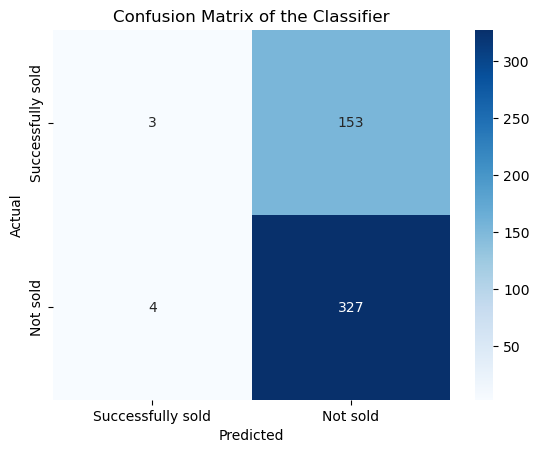

In [21]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Successfully sold', 'Not sold'])

In [22]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5036


<h2> Training model <h2\>

In [23]:
# preparing x-variables
# x_data = housing.loc[ : , reduced_x ] # x-variables (can change this)
# x_data = chef.drop(candidate_dict['logit_sig'], axis=1)
x_data = chef.loc[:, candidate_dict['logit_sig']]

# preparing y-variable
y_data = chef.loc[ : , 'CROSS_SELL_SUCCESS']    # y-variable
#y_data = housing.loc[ : , 'logSale_Price']     # y-variable


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219 ) # random state alwys 219




In [24]:
# zipping each feature name to its coefficient
logreg_model_values = zip(chef[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.04)
('REVENUE', -0.0)
('UNIQUE_MEALS_PURCH', -0.1)
('AVG_TIME_PER_SITE_VISIT', 0.05)
('CANCELLATIONS_AFTER_NOON', 0.14)
('LATE_DELIVERIES', 0.0)
('NOT_SPAM_EMAILS', 0.6)
('LOGINS_AND_UNIQUE_MEALS_PURCH', 0.07)
('TIME_VISIT_AND_UNIQUE_MEALS_PURCH', -0.05)
('CANCEL_AND_UNIQUE_MEALS_PURCH', 0.04)


In [25]:
# Declaring a hyperparameter space for decision tree
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [None, 2, 4, 6, 8, 10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Creating a hyperparameter grid for decision tree
param_grid = {'criterion': criterion,
              'splitter': splitter,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

# Instantiating the model object without hyperparameters
tuned_tree = DecisionTreeClassifier()

# Creating a RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator=tuned_tree,
                                   param_distributions=param_grid,
                                   cv=4,
                                   n_iter=100,
                                   random_state=None)

# Fitting the RandomizedSearchCV object to the dataset
tuned_tree_cv.fit(x_train, y_train)

# Printing the optimal parameters and best score
print("Tuned Parameters: ", tuned_tree_cv.best_params_)
print("Tuned Training R-Square:", tuned_tree_cv.best_score_.round(4))


Tuned Parameters:  {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 4, 'criterion': 'gini'}
Tuned Training R-Square: 0.6936


<h2> Decision Tree Classifier - Best model <h2\>

In [26]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

Note: The following model is the best performing one of all 

In [27]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier(max_depth = 4,
                                   splitter = 'best', 
                                   min_samples_split = 5, 
                                   min_samples_leaf = 4, 
                                   criterion = 'entropy'
                                  ) # max_depth 8 as max


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


######### Calling these veriables with the results later #########

# variable for Full Tree Train Acc
dec_tree_class_train_acc = full_tree_fit.score(x_train,
                                                     y_train).round(4)
# variable for Full Tree Test Acc
dec_tree_class_test_acc = full_tree_fit.score(x_test,
                                                     y_test).round(4)
# variable for Full Tree GAP
dec_tree_class_gap = dec_tree_class_test_acc - dec_tree_class_train_acc



# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4)) # printing train score

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4)) # printing test score

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4)) # printing auc score


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.706
Full Tree Testing ACCURACY : 0.7207
Full Tree AUC Score: 0.6389


In [28]:
### SCORE FOR FULL TREE CLASSIFIER ###

GAP = 0.7207 - 0.706 #gap

SCORE = 0.6389 + 0.10 - GAP  #score

print(GAP) # Gap

print(SCORE) #print score

0.014700000000000046
0.7242


In [29]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn} 
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 2 
False Positives: 150
False Negatives: 5
True Positives : 330



<h2> Confusion Matrix - Decision Tree Classifier (Best model) <h2\>

In order to see the equilibrium of our model when it comes to the confusion matrix graphically shows us what each square in the matrix means. For example, negatives which as seen in the blue-colored matrix down below, are represented as zeroes, and positives are represented by ones. 

On one hand false positives mean that wine was not successfully sold to customers, yet the model predicted them to buy. As seen in the actual matrix below, there were 88 false positives. This can be good or bad, it all depends on the context of the rest of the variables. 
On the other hand, though, we have many more true positives, which means that customers were expected to buy wine and indeed they bought it. This makes sense to be square with the highest number of customers, and also proves that the model is trustable because compared to the rest it represents the majority. 

Also, it can be seen in the lower-left corner, there are only 48 false negatives. This is a good sign because this being the square with the lowest number means that it was predicted more or less correctly the number of people that would not buy wine but ended up buying it. In this case, since false positives are almost double the false negatives, lack of supply is not an issue, but it could become an issue in the hypothetical case this became the opposite. 


<br><br>
<h3>Confusion Matrix</h3><br>


~~~
                   |
  True Negatives   |  False Positives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
  (incorrect)      |  (correct)
                   |
~~~

<br><br>
Regarding chef's dataset, this is what each square means:<br><br>

~~~
                                                 |
  PREDICTED: Did not buy wine (m_boat=0)         |  PREDICTED: Did buy wine      (m_boat=1)
  ACTUAL:    Did not buy wine (m_boat=0)         |  ACTUAL:    Did not buy wine  (m_boat=0)
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
  PREDICTED: Did not buy wine (m_boat=0)         |  PREDICTED: Did buy wine  (m_boat=1)
  ACTUAL:    Did buy wine     (m_boat=1)         |  ACTUAL:    Did buy wine  (m_boat=1)
                

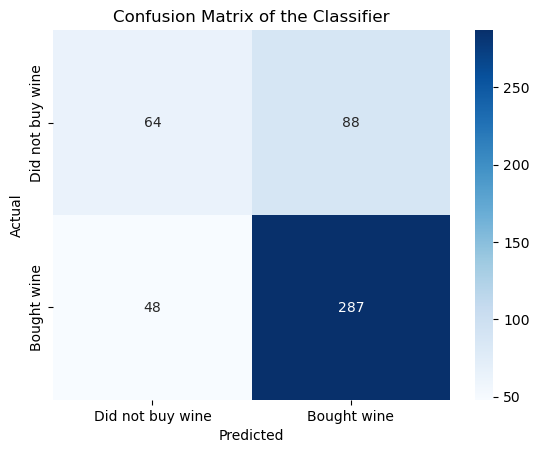

In [30]:
# calling the visual_cm function
visual_cm(true_y = y_test, # y test
          pred_y = full_tree_pred, # pred y
          labels = ['Did not buy wine', 'Bought wine'])

In [31]:
# declaring a hyperparameter space for decision tree
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [None, 2, 4, 6, 8, 10]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# creating a hyperparameter grid for decision tree
param_grid = {'criterion': criterion,
              'splitter': splitter, # splitter
              'max_depth': max_depth,
              'min_samples_split': min_samples_split, # min samples split
              'min_samples_leaf': min_samples_leaf}

# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier()

# RandomizedSearchCV object
tuned_tree_cv1 = RandomizedSearchCV(estimator          = tuned_tree,  # model we are using
                                    param_distributions = param_grid,  # tuning options (dictionary)
                                    cv                  = 17,           # how many folds we want
                                    n_iter              = 1000,         # maximum models to build
                                    random_state        = None)        # remove the random_state parameter

# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv1.fit(x_data, y_data)

# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv1.best_params_)
print("Tuned Training R-Square:", tuned_tree_cv1.best_score_.round(4))


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 216 is smaller than n_iter=1000. Running 216 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 2, 'criterion': 'gini'}
Tuned Training R-Square: 0.7036


<H2> Decision Tree Classifier <H2\>

In [32]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 3,
                                     min_samples_leaf = 4, 
                                     random_state     = 219, 
                                     criterion        = 'entropy', 
                                     splitter         = 'best')


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


######### Calling these veriables with the results later #########

# variable for Full Tree Train Acc
dec_tree_class1_train_acc = tree_pruned_fit.score(x_train, y_train).round(4)
# variable for Full Tree Test Acc
dec_tree_class1_test_acc = tree_pruned_fit.score(x_test, y_test).round(4)
# variable for Full Tree GAP
dec_tree_class1_gap = dec_tree_class1_test_acc - dec_tree_class1_train_acc



# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4)) # printing train score
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4)) # printing auc score


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7005
Testing  ACCURACY: 0.7228
AUC Score        : 0.6404


In [33]:
GAP = 0.7228 - 0.7005

Score_final = 0.6404 + 0.10 - GAP

print(GAP)
print(Score_final)

0.022299999999999986
0.7181


<h2> Gradient Boosting Classifier <h2\>

The Gradient Boosting Classifier model is the one that performed best when it comes to AUC score, which gave us 0.6497, almost 0.65, but the fact that its train-test-gap of 0.046 being greater than the final chosen model, Decision Tree Classifier of 0.0147, makes this model not so reliable 

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting Classifier object with the specified parameters
gb = GradientBoostingClassifier(loss='deviance', 
                                learning_rate= 4, 
                                n_estimators=50, 
                                max_depth=3, # max depth 3
                                min_samples_split=2, 
                                min_samples_leaf=1) # min sample leaf 1

# FITTING the training data
gb.fit(x_train, y_train)

# PREDICTING on new data
gb_pred = gb.predict(x_test)


######### Calling these veriables with the results later #########

# variable for Full Tree Train Acc
dec_tree_class2_train_acc = tree_pruned_fit.score(x_train, y_train).round(4)
# variable for Full Tree Test Acc
dec_tree_class2_test_acc = tree_pruned_fit.score(x_test, y_test).round(4)
# variable for Full Tree GAP
dec_tree_class2_gap = dec_tree_class2_test_acc - dec_tree_class2_train_acc



# SCORING the model
print('Training ACCURACY:', gb.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gb.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true=y_test, y_score=gb_pred).round(4))

# saving scoring data for future use
gb_train_score = gb.score(x_train, y_train).round(4) # accuracy
gb_test_score = gb.score(x_test, y_test).round(4) # accuracy

# saving auc score
gb_auc_score = roc_auc_score(y_true=y_test, y_score=gb_pred).round(4) # auc


Training ACCURACY: 0.6621
Testing  ACCURACY: 0.7084
AUC Score        : 0.6497


In [35]:
# area under the roc curve (auc)
print(roc_auc_score(y_true=y_test, y_score=gb_pred).round(decimals=4))

# saving AUC score for future use
gb_auc_score = roc_auc_score(y_true=y_test, y_score=gb_pred).round(decimals=4)


0.6497


In [36]:
gb_tn, gb_fp, gb_fn, gb_tp = confusion_matrix(y_true = y_test, y_pred = gb_pred).ravel()

# printing each result one-by-one
print(f"""
True Negatives : {gb_tn}
False Positives: {gb_fp}
False Negatives: {gb_fn}
True Positives : {gb_tp}
""")



True Negatives : 75
False Positives: 77
False Negatives: 65
True Positives : 270



In [37]:
GAP = 0.7084 - 0.6621

Score_final = 0.6497 + 0.10 - GAP

print(GAP)
print(Score_final)

0.04630000000000001
0.7034


In [38]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 2
False Positives: 150
False Negatives: 5
True Positives : 330



<h2> Hyperparameters <h2\>

Hyper-tuning has helped tweak the following models a little bit, by even improving their AUC scores by 0.8 points when changing their parameters, especially the number of estimators and maximum depth scores. But after changing them once hyper-tuning hasn’t helped much anymore. 

In [39]:
# declaring a hyperparameter space for k-nearest neighbors
n_neighbors = range(1, 31)
weights = ['uniform', 'distance']
p = [1, 2]

# creating a hyperparameter grid for k-nearest neighbors
param_grid = {'n_neighbors': n_neighbors,
              'weights': weights,
              'p': p}

# INSTANTIATING the model object without hyperparameters
tuned_tree = KNeighborsClassifier()

# RandomizedSearchCV object
tuned_tree_cv1 = RandomizedSearchCV(estimator          = tuned_tree,  # model we are using
                                    param_distributions = param_grid,  # tuning options (dictionary)
                                    cv                  = 4,           # how many folds we want
                                    n_iter              = 100,         # maximum models to build
                                    random_state        = None)        # remove the random_state parameter

# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv1.fit(x_data, y_data)

# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv1.best_params_)
print("Tuned Training R-Square:", tuned_tree_cv1.best_score_.round(4))


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Tuned Parameters  : {'weights': 'uniform', 'p': 2, 'n_neighbors': 29}
Tuned Training R-Square: 0.6778


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [40]:
# declaring a hyperparameter space for KNN model
n_neighbors_range = range(1, 20)
weights_options = ['uniform', 'distance']
p_options = [1, 2]

# creating a hyperparameter grid for KNN
param_grid = {'n_neighbors': n_neighbors_range,
              'weights': weights_options,
              'p': p_options}

# INSTANTIATING the model object without hyperparameters
knn = KNeighborsClassifier()

# RandomizedSearchCV object
tuned_knn_cv = RandomizedSearchCV(estimator = knn,                   # model we are using
                                  param_distributions = param_grid,  # tuning options (dictionary)
                                  cv = 10,                            # how many folds we want
                                  n_iter = 150,                      # maximum models to build
                                  random_state = 219)                # for replicating results

# FITTING to the FULL DATASET (due to cross-validation)
tuned_knn_cv.fit(x_data, y_data)

# printing the optimal parameters and best score
print("Tuned Parameters:", tuned_knn_cv.best_params_)
print("Tuned Training Accuracy:", np.round(tuned_knn_cv.best_score_, 4))


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 76 is smaller than n_iter=150. Running 76 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Tuned Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 19}
Tuned Training Accuracy: 0.6645


<h2> KNN <h2\>

In [41]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test = 0.25,
                      seed = 219,
                      response_type = 'reg',
                      max_neighbors = 38,
                      show_viz = True, 
                     ):
    

    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


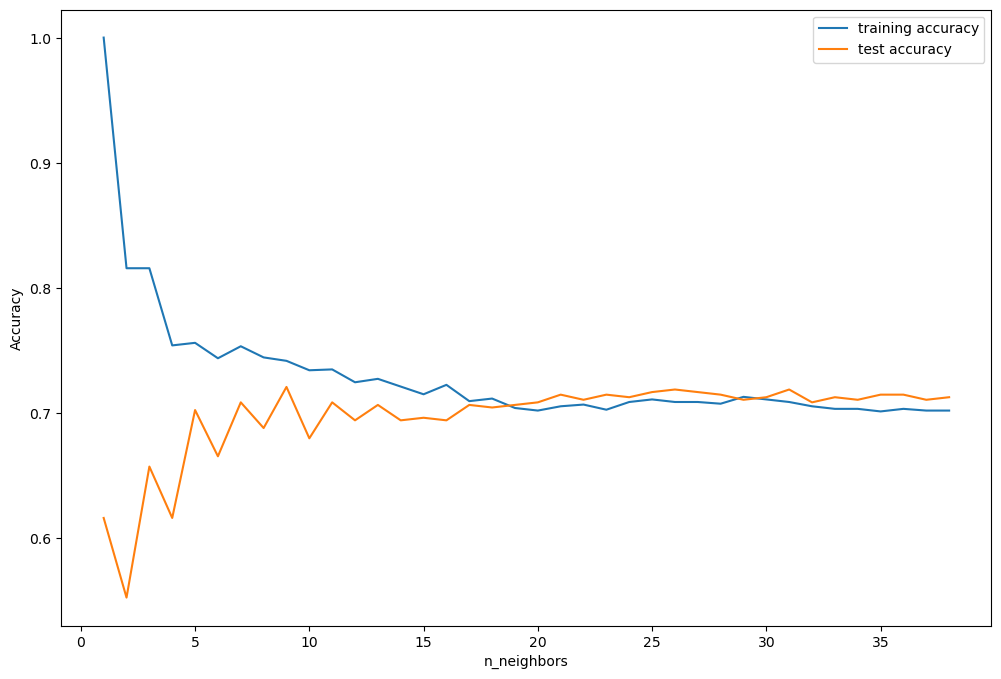

The optimal number of neighbors is: 9


In [42]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = chef_data,
                                  y_data        = chef_target,
                                  response_type = 'class')

In [43]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(chef_data)

# TRANSFORMING the data
x_scaled = scaler.transform(chef_data)

# converting to a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            chef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = chef_target)

# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 29,
                                weights = 'uniform', 
                                p = 2)

# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)

# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


######### Calling these veriables with the results later #########

# variable for Full Tree Train Acc
KNN_class1_train_acc = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
# variable for Full Tree Test Acc
KNN_class1_test_acc = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
# variable for Full Tree GAP
KNN_class1_gap = roc_auc_score(y_true = y_test_scaled,
                                  y_score = knn_pred).round(4)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score:', roc_auc_score(y_true = y_test_scaled,
                                  y_score = knn_pred).round(4))

# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score = knn_fit.score(x_test_scaled, y_test_scaled).round(4)

# saving AUC score
knn_auc_score = roc_auc_score(y_true = y_test_scaled,
                              y_score = knn_pred).round(4)


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training ACCURACY: 0.7142
Testing  ACCURACY: 0.694
AUC Score: 0.5868


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [44]:
GAP = 0.7142 - 0.694

Score_final = 0.5868 + 0.10 - GAP

print(GAP)
print(Score_final)

0.020199999999999996
0.6666


In [45]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors  = 29,
                                weights      = 'uniform', # Use 'distance' or 'uniform'
                                p            = 1) # Use p = 1 for Manhatan distance


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


######### Calling these veriables with the results later #########

# variable for Full Tree Train Acc
KNN_class2_train_acc = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
# variable for Full Tree Test Acc
KNN_class2_test_acc = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
# variable for Full Tree GAP
KNN_class2_gap = roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4)

C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training ACCURACY: 0.706
Testing  ACCURACY: 0.7084
AUC Score        : 0.6025


C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bromi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [46]:
GAP = 0.7084 - 0.706

Score_final = 0.6025 + 0.10 - GAP

print(GAP)
print(Score_final)

0.0024000000000000687
0.7001


In [47]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 2
False Positives: 150
False Negatives: 5
True Positives : 330



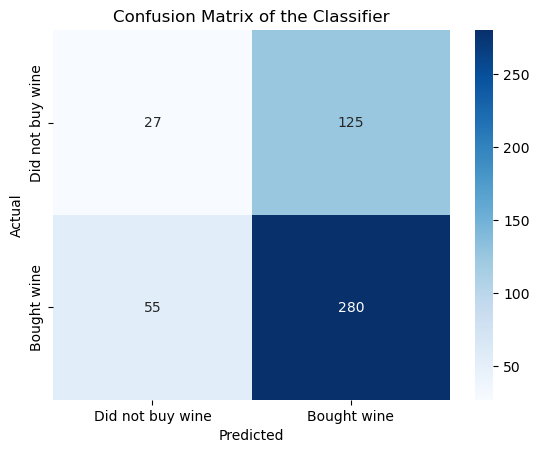

In [48]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Did not buy wine', 'Bought wine'])

In [49]:
# comparing results
print(f"""
Model                          AUC Score      Confusion matrix (TN, FP, FN, TP)                                                   
-----                          ---------      ---------------------------------                                                         
Logistic                       {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree                      {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree                    {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
Gradient Boosting Classifier   {gb_auc_score}           {gb_tn, gb_fp, gb_fn, gb_tp}


                              Training Accuracy           Testing Accuracy             Train-Test GAP
                              -----------------           ----------------             --------------
Decision tree classifier 1     {dec_tree_class1_train_acc}                    {dec_tree_class1_test_acc}                                 {dec_tree_class1_gap.round(4)}
Decision tree classifier 0     {dec_tree_class_train_acc}                     {dec_tree_class_test_acc}                                  {dec_tree_class_gap.round(4)}
Gradient Boosting Classifier   {dec_tree_class2_train_acc}                    {dec_tree_class2_test_acc}                                  {dec_tree_class2_gap.round(4)}
KNN 1                          {KNN_class1_train_acc}                      {KNN_class1_test_acc}                                      {KNN_class1_gap.round(4)}                     
KNN 2                          {KNN_class2_train_acc}                      {KNN_class2_test_acc}                                      {KNN_class2_gap.round(4)}                     






------------------------------------------------------------------------------------------------------------------
                                               FINAL MODEL:
------------------------------------------------------------------------------------------------------------------


Model                           AUC Score      |     Training Accuracy     |     Testing Accuracy     |    Train-Test GAP
-----                           -----------------------------------------------------------------------------------  
Gradient Boosting Classifier     {full_tree_auc_score}          |       {dec_tree_class_train_acc}         |        {dec_tree_class_test_acc}         |        {dec_tree_class_gap.round(4)}





""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree', 'Gradient Boosting Classifier'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score, gb_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score, gb_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score, gb_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (gb_tn, gb_fp, gb_fn, gb_tp)]}
    

    
 

 
 
 
    

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('classification_model_performance.xlsx',
                           index = False)



Model                          AUC Score      Confusion matrix (TN, FP, FN, TP)                                                   
-----                          ---------      ---------------------------------                                                         
Logistic                       0.5036         (3, 153, 4, 327)
Full Tree                      0.6389           (2, 150, 5, 330)
Pruned Tree                    0.6404         (2, 150, 5, 330)
Gradient Boosting Classifier   0.6497           (75, 77, 65, 270)


                              Training Accuracy           Testing Accuracy             Train-Test GAP
                              -----------------           ----------------             --------------
Decision tree classifier 1     0.7005                    0.7228                                 0.0223
Decision tree classifier 0     0.706                     0.7207                                  0.0147
Gradient Boosting Classifier   0.7005                    0.72

To conclude, and as seen below, the best-performing model is Gradient Boosting Classifier, which got a AUC score of 0.6389, near to 0.64. This means that the model is able to predict which variables are best in increasing our y-variable of CROSS_SALE_SUCCESS, or which is the same the wines successfully sold to to the company’s consumers. Although it can only predict it with almost 0.64% accuracy, while the other 36% is still giving us mainly false positives or telling us people will buy wine when they won’t. 
But it predicts the following variables overall. 

-	'REVENUE', 
-	'UNIQUE_MEALS_PURCH', 
-	'AVG_TIME_PER_SITE_VISIT', 
-	'CANCELLATIONS_AFTER_NOON', 
-	'LATE_DELIVERIES', 
-	'NOT_SPAM_EMAILS', 
-	'LOGINS_AND_UNIQUE_MEALS_PURCH', 
-	 'TIME_VISIT_AND_UNIQUE_MEALS_PURCH', 
-	 'CANCEL_AND_UNIQUE_MEALS_PURCH'
